# Project: Investigate The Movie Database (TMDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database (TMDb) dataset, originally from Kaggle was cleaned and provided by Udacity. The dataset contains information about 10,000 movies from the year 1960 to 2015 collected from The Movie Database (TMDb), including user ratings and revenue.
The questions that I will explore over the course of the report:
- **Q1: What are the properties and attributes of the movies from year 1960 to 2015?**
 - Movie that makes the most and least profit?
 - Movie with the highest and lowest budget?
 - Movie with highest and lowest revenue?
 - Movie with the longest and shortest runtime?
 - The average movie runtime?
 - The month with the most movies released?
 - The year with the most movies released?
 - The year that makes the most profit?
 - Who starred in the most movies?
 - Who directed the most movies?
 - The most popular popular production companies?
 - The most popular genre?
 - The most common keywords? 
- **Q2: What kind of properties are associated with movies that have high profit?**
 - High profit movies average runtime?
 - High profit movies average budget?
 - High profit movies average revenue?
 - In which month the movies makes the most profit?
 - In which year the movies makes the most profit?
 - High profit movie casts?
 - High profit movie directors?
 - High profit production companies?
 - High profit movie genre?
 - High profit movie keywords?

In [2]:
# import statements for all of the packages that I plan to use. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties
Below are the questions to answer using pandas to explore ```tmdb-movies.csv``` and have a holistic understanding of the data set:

- Number of samples & columns in the dataset
- Duplicate rows in the dataset
- Datatypes of the columns
- Features with missing values
- Number of unique values for the dataset
- Number of rows with missing values in the dataset
- Descriptive statistics for the dataset
- Number of zero values in ```runtime```, ```budget_adj``` and ```revenue_adj```

In [3]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


>**Observations:** 
>- Columns like ```cast```, ```keywords```, ```genres``` and ```production_companies```, contain multiple values separated by pipe (|) characters. 
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. I will drop the original value and retain the two columns so that I can better compare dollar values from one year to another.
- Noticed that the ```vote_count``` is different for all the movies, so I will not be able to calculate the popularity of the movies based on the value.

#### Number of samples & columns in the dataset
Based on the result shown below, there are a total of 10,866 number of movies and 21 columns in the dataset.

In [4]:
# To check the size of the dataset
movie_df.shape

(10866, 21)

#### Duplicate rows in the dataset
There is only 1 duplicated row which I will drop it in the next section on data cleaning.

In [5]:
# To get the total number of duplicated rows in the dataset 
movie_df.duplicated().sum()

1

In [6]:
# To check and make sure that the duplicated row is exactly the same
movie_df[movie_df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Datatype of column in the dataset
```info``` is use to find the basic information like datatype of column in the dataset. Noticed that column such as ```release_date``` is not using the date datatype, ```budget_adj``` and ```revenue_adj``` are float datatype which I will work on it in the next section.

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Features with missing values in the dataset
There are a number of null values in the dataset for these columns: ```imdb_id```, ```cast```, ```homepage```, ```director```, ```tagline```, ```keywords```, ```overview```, ```genres``` and ```production_companies```. Huge number of null values for ```homepage```, ```tagline```, ```keywords``` and ```production_companies``` but since some of them are not necessary for answering my above questions, I will drop them during the data cleaning section.

In [8]:
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Number of unique values for the dataset
To see the total number of unique values for each column.

In [9]:
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Number of rows with missing values in the dataset
To check the total number of rows with at least one column with missing values. 

In [10]:
movie_df.isnull().any(axis=1).sum()

8874

#### Descriptive statistics for the dataset
Based on the table shown below, 50% of the value in ```budget``` and ```revenue``` are of zero value. The minimum value for runtime is 0 which means that there could be a number of values of zero value in ```runtime```.

In [11]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Number of zero values in ```runtime```, ```budget_adj``` and ```revenue_adj``` 
In order to decide whether to drop the zero values in the dataset, I will need to get the total number of zero in each column.

In [12]:
# Return the number of zero in runtime column
zero_runtime = (movie_df['runtime'] == 0).sum()
print(zero_runtime)

31


In [13]:
# Return the number of zero in budget_adj column
zero_budget = (movie_df['budget_adj'] == 0).sum()
print(zero_budget)

5696


In [14]:
# Return the number of zero in revenue_adj column
zero_revenue = (movie_df['revenue_adj'] == 0).sum()
print(zero_revenue)

6016


>**Observations:** 
>- There are 31 zero values rows in ```runtime```, 5,698 zero values rows in ```budget_adj``` and 6,016 zero value rows in ```revenue_adj```. It is a huge amount of missing data for ```budget_adj``` and ```revenue_adj```. In order not to drop more than 50% of the data that will affect my statistics and visualization result, I decided to retain these rows and replace them with mean values. 
- As for the zero values in ```runtime```, in order to have the full dataset for exploration, I will also retain these rows and replace them with mean values.

### Data Cleaning
After the above discussion on the structure of the dataset and the problems that need to be cleaned, the following are the cleaning steps to be performed:

1. Drop Extraneous Columns
2. Drop the Duplicates
3. Add new column ```profit```
4. Mark zero values with NaN
5. Replace zero values with mean
6. Convert ``` release_date``` column to Date datatype

#### Drop Extraneous Columns
- Drop columns that aren't relevant to our questions. Columns to Drop: ```id```, ```imdb_id```, ```popularity```, ```homepage```, ```overview```, ```tagline```
- ```budget``` and ```revenue``` will also be drop as I will be using the final two columns ending with “_adj” which show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [15]:
# drop columns from the dataset
movie_df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'overview', 'vote_count', 
               'vote_average', 'tagline'], axis=1, inplace=True)

# confirm changes
movie_df.head(1)

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


#### Drop the Duplicates

In [16]:
# drop duplicates in the datasets
movie_df.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
movie_df.duplicated().sum() 

0

#### Add new column ```Profit```

In [17]:
# Insert a new column profit calculated using revenue minus budget
movie_df['profit'] = movie_df['revenue_adj'] - movie_df['budget_adj'] 

In [18]:
# To confirm the changes
movie_df.head(1)

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09,1.254446e+09


#### Mark zero values with NaN

Based on the previous Descriptive statistics for the dataset, 50% of the value in ```budget``` and ```revenue``` are of zero value. The minimum value for runtime is 0 which means that there could be a number of values of zero value in ```runtime```.

Considering the impact of dropping all the rows with zero might impact my analysis, I will first mark the zero values as NaN so that I can replace them with mean values in the next section.

In [19]:
# Create a list with zero values 
zero_list=['runtime', 'budget_adj', 'revenue_adj']

# Replace all the value from '0' to NAN in the list
movie_df[zero_list] = movie_df[zero_list].replace(0, np.NAN)

In [20]:
# Confirm the changes
movie_df.describe()

,runtime,release_year,budget_adj,revenue_adj,profit
count,10834.000000,10865.000000,5.169000e+03,4.849000e+03,1.086500e+04
mean,102.363855,2001.321859,3.688907e+07,1.151009e+08,3.381911e+07
std,30.948225,12.813260,4.196096e+07,1.988557e+08,1.252194e+08
min,2.000000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,90.000000,1995.000000,8.102293e+06,1.046585e+07,0.000000e+00
50%,99.000000,2006.000000,2.271505e+07,4.395666e+07,0.000000e+00
75%,112.000000,2011.000000,5.008384e+07,1.316482e+08,1.293091e+07
max,900.000000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


#### Replace zero values with mean

The choosen way to handle the missing values is imputing them with the mean.

In [21]:
# use means to fill in missing values
movie_df['runtime'].fillna((movie_df['runtime'].mean()), inplace=True)
movie_df['budget_adj'].fillna((movie_df['budget_adj'].mean()), inplace=True)
movie_df['revenue_adj'].fillna((movie_df['revenue_adj'].mean()), inplace=True)

In [22]:
# Confirm the changes
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
profit                  10865 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


#### Convert ``` release_date``` column to Date datatype
To convert ```release_date``` column to date format (year-month-day).

In [23]:
# convert release_date to datetime format
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# confirm changes
movie_df.dtypes

original_title                  object
cast                            object
director                        object
keywords                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
profit                         float64
dtype: object

In [24]:
# save progress for the next section
movie_df.to_csv('tmdb-movies-cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data, I can compute statistics and create visualizations with the goal of addressing the research questions that I have posed in the Introduction section. 

### Q1: What are the properties and attributes of the movies from year 1960 to 2015?

#### Movie that makes the most and least profit?

In [25]:
# Create function to calculate highest and lowest value
def calculate_highest_lowest(column):
    # get highest value
    highest = movie_df[column].idxmax()
    highest_details = pd.DataFrame(movie_df.loc[highest])
    
    # get lowest value
    lowest = movie_df[column].idxmin()
    lowest_details = pd.DataFrame(movie_df.loc[lowest])  
    
    # Combine both data into one table
    info = pd.concat([highest_details, lowest_details], axis=1)
    
    return info

# get movie that make the highest and lowest profit
calculate_highest_lowest('profit')

,1329,2244
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
release_year,1977,2010
budget_adj,3.95756e+07,4.25e+08


> Based on the table shown above, the movie 'Star Wars' has the highest profit, making more than 2.7 Billion dollars and the movie 'The Warrior's Way' make a lost by more than 400 Million dollars . Looking at the number of 'Stars Wars' series till today, I am not surprise 'Stars Wars' has the highest profit compare to all the movies. On the other hand, based on the statistics 'The Warrior's Way' has the lowest profit could be due to their high budget of more than 400 Million dollars.

#### Movie with the highest and lowest budget?

In [26]:
# get movie with the highest and lowest budget
calculate_highest_lowest('budget_adj')

,2244,1151
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
production_companies,Boram Entertainment Inc.,Dry County Films|Anchor Bay Entertainment|Movi...
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
release_year,2010,2014
budget_adj,4.25e+08,0.921091


> As expected the movie 'The Warrior's Way' has the highest budget of more than 400 Million dollars. The movie 'Lost & Found 'has the lowest budget of only 1 dollar which doesn't seems to be right. I did a search on the web and found that the movie 'Lost & Found' has a budget of 30 million dollars which is different from the one shown in the dataset so there could be some error with the values. Therefore, this movie may not be the one with the lowest budget.

#### Movie with highest and lowest revenue?

In [27]:
# get movie that make the highest and lowest revenue
calculate_highest_lowest('revenue_adj')

,1386,5067
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003
budget_adj,2.40887e+08,7.11212e+06


> Based on the table shown above, the movie 'Avatar' has the highest revenue, making more than 2.8 Billion dollars and the movie 'Shattered Glass' making only 2 dollars which doesn't seems to be right. I did a search on the web and found that the movie 'Shattered Glass' has a box office result of 2.9 Million which is different from the on shown in the datase. This could be due to typo in the dataset so this movie may not be the one with the lowest revenue.

#### Movie with the longest and shortest runtime?

In [28]:
# get movie that has the longest and shortest runtime
calculate_highest_lowest('runtime')

,3894,4883
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900,2
genres,Documentary,Animation
production_companies,NaN,NaN
release_date,2011-09-03 00:00:00,2012-03-02 00:00:00
release_year,2011,2012
budget_adj,3.68891e+07,3.68891e+07


>- 900 minutes is the longest movie titled 'The Story of Film: An Odyssey', which is equivalent to 15 hours! 'The Story of Film: An Odyssey' is a documentary film about the history of film, presented on television in 15 one-hour chapters.
>- 2 minute is the shortest movie goes to 'Fresh Guacamole' with a running time of only 2 minutes. 'Fresh Guacamole' is a 2012 American animated short film written and directed by PES.

#### The average movie runtime?

In [29]:
# Return the average runtime of the movies
movie_df['runtime'].mean()

102.36385453202878

> Based on the above, the average runtime of the movies is 102 minutes. Let's use visualization to see the distribution of the runtime.

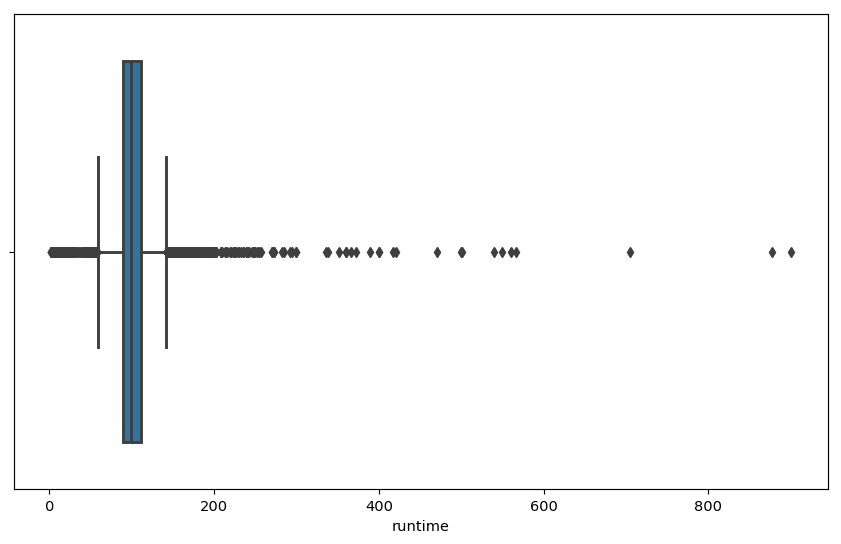

In [30]:
# Create box plot to see the distribution of the runtime 
plt.figure(figsize=(10,6), dpi = 105)

# Use seaborn to generate the boxplot
sns.boxplot(movie_df['runtime'], linewidth = 2)
# Diplay the plot
plt.show()

> We can see from the above that most of the movies have an average of 100 minutes. A number of outliers of movie with more than 700 minutes.

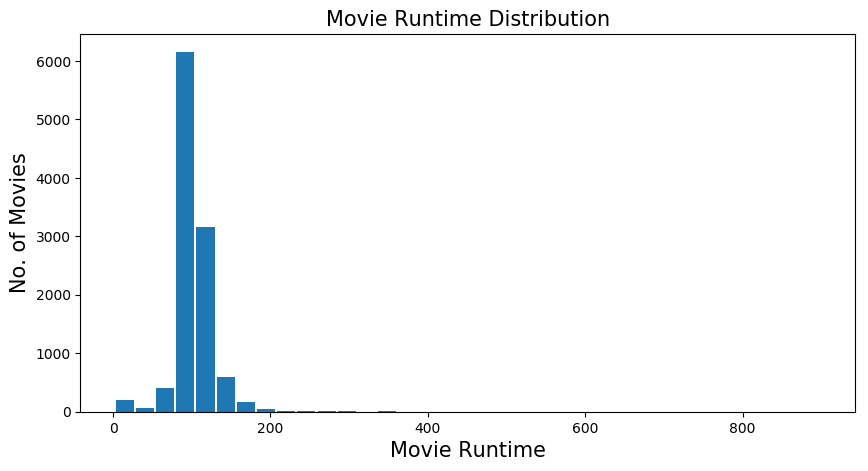

In [31]:
# Create histogram to see the distribution of the runtime 
plt.figure(figsize=(10,5), dpi = 100)

# x-axis 
plt.xlabel('Movie Runtime', fontsize = 15)
# y-axis 
plt.ylabel('No. of Movies', fontsize=15)
# Name of the graph
plt.title('Movie Runtime Distribution', fontsize=15)

# Plot the Histogram
plt.hist(movie_df['runtime'], rwidth = 0.9, bins =35)
# Diplay the plot
plt.show()

> Again, We can see that more than 6,000 of the movies are of 100+ minutes.

In [32]:
# Get the descriptive statistics for the runtime column
movie_df['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

>Based on the analysis above, I can conclude that:
- 25% of movies have a runtime of 90 minutes.
- 50% of movies have a runtime of 99 minutes.
- 75% of movies have a runtime of 111 minutes.
- Average of the movies have a runtime of 102 minutes.
- The longest movie is 900 minutes and the movie is 'The Story of Film: An Odyssey'.
- The shortest movie is 2 minute and the movie is 'Fresh Guacamole'.

#### The month with the most movies released?

In [33]:
# Create a new column month by extracting the month from the release date
movie_df['month'] = movie_df['release_date'].apply(lambda x: x.month)

In [34]:
# Group by month and count of the movies each month.
movie_per_month = movie_df.groupby('month')['original_title'].count()
movie_per_month

month
1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: original_title, dtype: int64

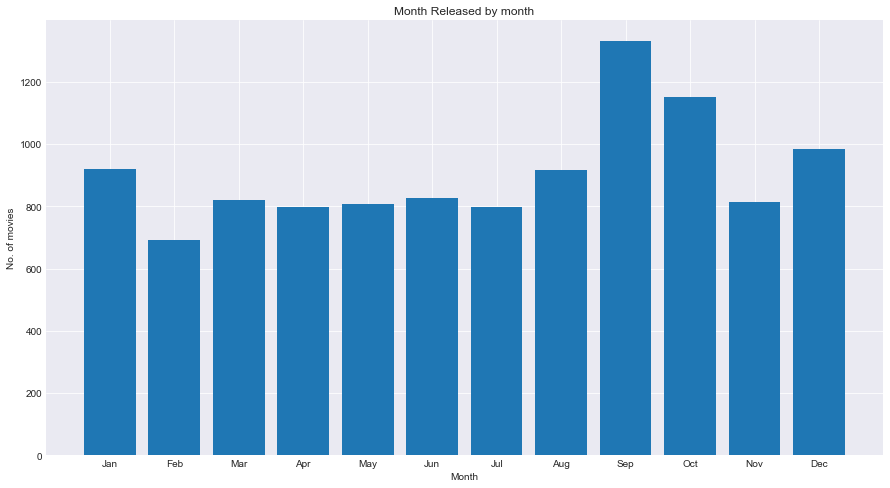

In [35]:
# Create a bar chart
sns.set_style('darkgrid')
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(15,8))
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], movie_per_month, tick_label = month_name)
plt.title('Month Released by month')
plt.ylabel('No. of movies')
plt.xlabel('Month');
        

>From the above analysis, we can see that Sep (> 1200 movies) is the most popular month follow by Oct (> 1,000 movies) and Dec (> more than 800 movies) for movies release.

#### The year with the most movies released?

In [41]:
# Group by year and count of the movies each year.
movie_per_year = movie_df.groupby('release_year')['original_title'].count()
movie_per_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: original_title, dtype: int64

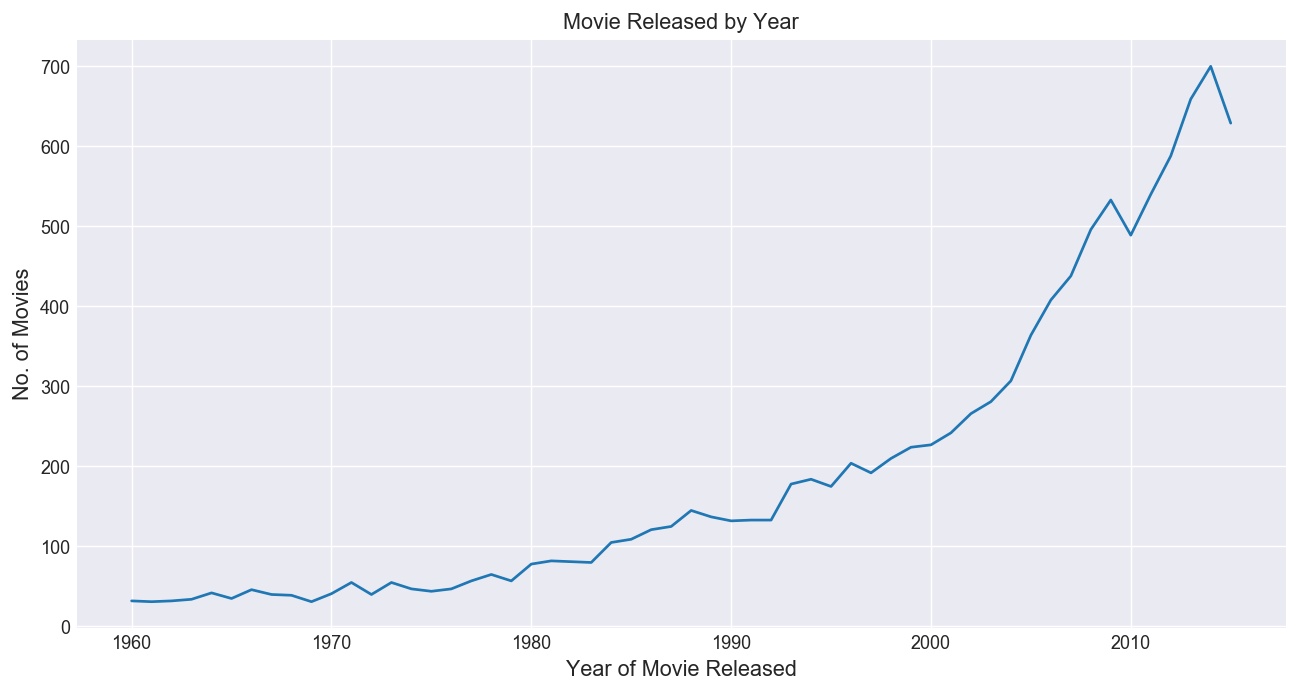

In [38]:
# Figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 12)
# y-axis
plt.ylabel('No. of Movies', fontsize = 12)
# Title
plt.title('Movie Released by Year')

# Plot Line chart
plt.plot(movie_per_year)

# Display plot
plt.show()

>Interestingly based on the above diagram, we can see that the trend of movie released each year increase year by year. I noticed that there is two significant drop, one is during late 2000s to 2010 and the other is drop around year 2015.

In [43]:
# Group by year and count of the movies each year.
movie_per_year = movie_df.groupby('release_year')['original_title'].count()
movie_per_year.tail(10)

release_year
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64

>By looking at the last 10 rows from the movies by year, we can see that the significant drop of movies are in:
- **Year 2009**: a drop of 44 movies from year 2009 (533 movies) to year 2010 (489 movies).
- **Year 2015**: a drop of 71 movies from year 2014 (700 movies) to year 2015 (629 movies).

#### The year that makes the most profit?

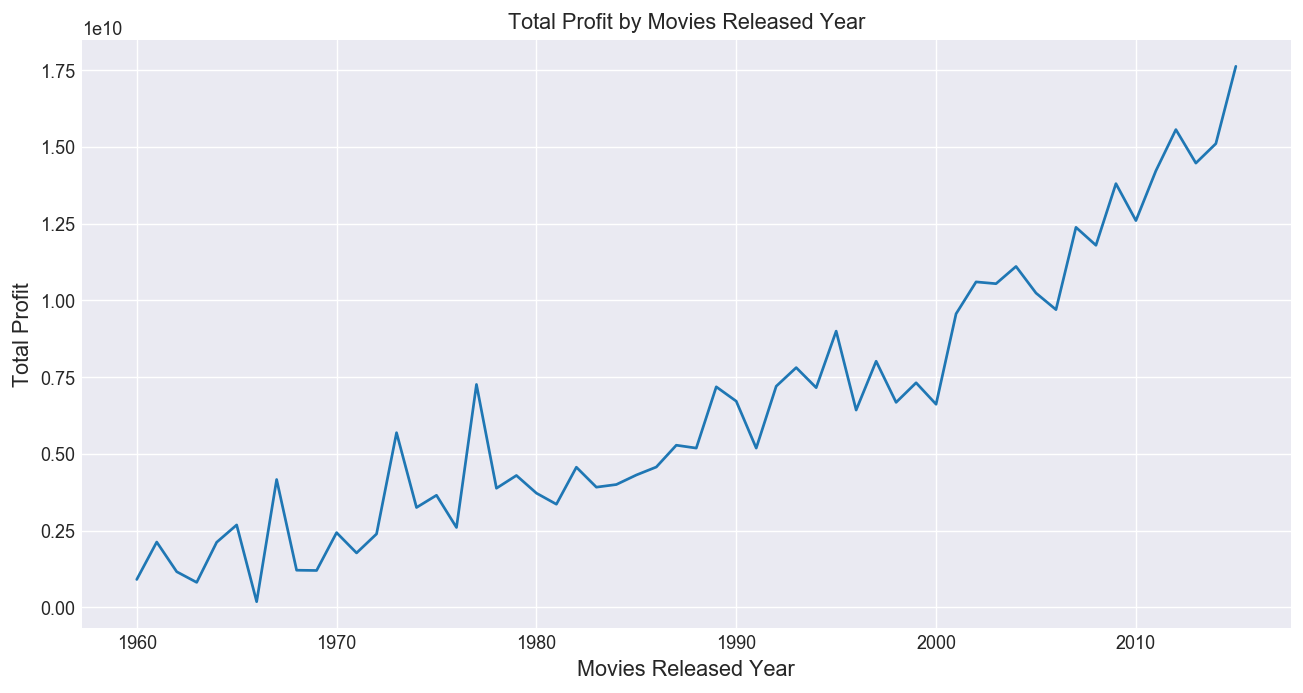

In [45]:
# Groupby release year and profit
profit_by_year = movie_df.groupby('release_year')['profit'].sum()

# Figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# x-axis
plt.xlabel('Movies Released Year', fontsize = 12)
# y-axis
plt.ylabel('Total Profit', fontsize = 12)
# Title
plt.title('Total Profit by Movies Released Year')

# Plot line Chart
plt.plot(profit_by_year)

# Display the line Chart
plt.show()

In [46]:
# Which year made the highest profit
profit_by_year.idxmax()

2015

>As shown above, the movies released in the year 2015 has the highest profit of more than 17 Billion dollars.

#### Who starred in the most movies?

In [47]:
def extract_data(column_name):

    data = movie_df[column_name].str.cat(sep = '|')
    
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # Display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [49]:
# Display top 10 casts
cast = extract_data('cast')
cast.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
dtype: int64

> XX

#### Who directed the most movies?

In [50]:
# Display top 10 directors
director = extract_data('director')
director.head(10)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           20
dtype: int64

> XXX

#### The most popular popular production companies?

In [ ]:
# Display top 10 production companies
production_companies = extract_data('production_companies')
production_companies.head(10)

> XXX

#### The most popular genre?

In [51]:
# Display top 10 genres
genres = extract_data('genres')
genres.head(10)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

> XXX

#### The most common keywords?

In [52]:
# Display top 10 keywords
keywords = extract_data('keywords')
keywords.head(10)

woman director      413
independent film    396
based on novel      278
sex                 272
sport               216
murder              204
biography           169
musical             169
new york            163
suspense            159
dtype: int64

> XXX

### Research Question 2 - What kind of properties are associated with movies that have high profit?

In order to analyze on the properties that are associated with movies that have high profit, I will have to filter the dataset to movies that made profit of more than 100 Million dollars.

In [56]:
# Create new dataframe by filter to movies that made profit of more than 100Million dollars 
high_revenue_movie = movie_df[movie_df['profit'] >= 100000000]

high_revenue_movie.head(3)

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit,month
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09,1.254446e+09,6
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,1.379999e+08,3.481613e+08,2.101614e+08,5
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.012000e+08,2.716190e+08,1.704191e+08,3


In [57]:
high_revenue_movie.describe()

,runtime,release_year,budget_adj,revenue_adj,profit,month
count,1089.000000,1089.000000,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000
mean,115.955923,1998.367309,7.353762e+07,3.715738e+08,3.005429e+08,7.463728
std,28.492322,13.089591,5.536918e+07,2.909409e+08,2.682571e+08,3.256613
min,44.000000,1960.000000,2.248029e+02,1.000516e+08,1.000516e+08,1.000000
25%,99.000000,1991.000000,3.389464e+07,1.903475e+08,1.381282e+08,5.000000
50%,113.000000,2001.000000,5.793440e+07,2.746954e+08,2.073424e+08,7.000000
75%,127.000000,2009.000000,1.047242e+08,4.460595e+08,3.616719e+08,11.000000
max,705.000000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12.000000


> From 10,865 movies, we are now down with only 1,089 movies which have profit of at least 100 Million dollars. The highest earning movie is 2.75 Million and from our previous analysis we know that the movie is Star Wars.

#### High revenue movie average runtime?

In [58]:
# Return the average runtime of the movies
high_revenue_movie['runtime'].mean()

115.95592286501378

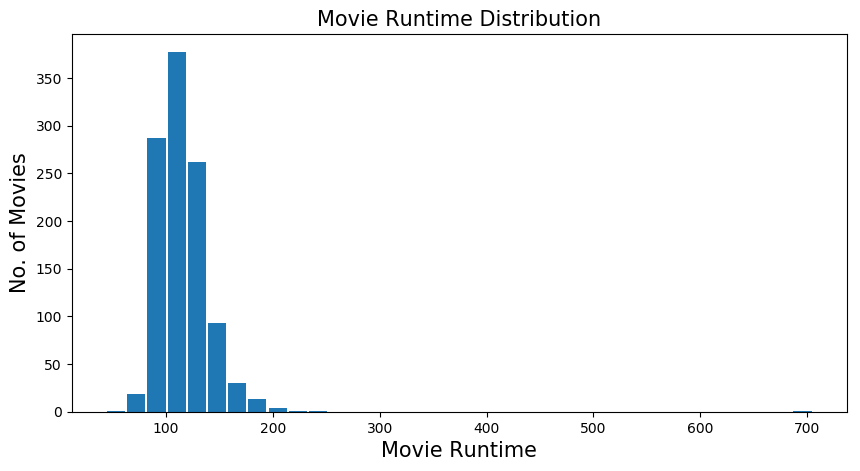

In [43]:
# Create histogram to see the distribution of the runtime 
plt.figure(figsize=(10,5), dpi = 100)

# x-axis 
plt.xlabel('Movie Runtime', fontsize = 15)
# y-axis 
plt.ylabel('No. of Movies', fontsize=15)
# Name of the graph
plt.title('Movie Runtime Distribution', fontsize=15)

# Plot the histogram
plt.hist(high_revenue_movie['runtime'], rwidth = 0.9, bins =35)
# Displays the plot
plt.show()

>XXX

#### High profit movies average budget?

In [59]:
# Return the average runtime of the movies
high_revenue_movie['budget_adj'].mean()

73537621.57359695

> XXX

#### High profit movies average revenue?

In [60]:
# Return the average runtime of the movies
high_revenue_movie['revenue_adj'].mean()

371573840.3492238

> XXX

#### In which month the movies makes the most profit?

In [65]:
# Group by year and count of the movies each month.
high_revenue_movie_per_month = high_revenue_movie.groupby('month')['original_title'].count()
high_revenue_movie_per_month

month
1      27
2      52
3      72
4      52
5     118
6     159
7     112
8      62
9      64
10     84
11    111
12    176
Name: original_title, dtype: int64

> XXX

#### In which year the movies makes the most profit?

In [66]:
# Group by year and count of the movies each year.
high_revenue_movie_per_year = high_revenue_movie.groupby('release_year')['original_title'].count()
high_revenue_movie_per_year.head()

release_year
1960    3
1961    3
1962    3
1963    2
1964    3
Name: original_title, dtype: int64

#### High profit movie casts?

In [67]:
def extract_high_revenue_data(column_name):

    data = movie_df[column_name].str.cat(sep = '|')
    
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # Display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [69]:
# Get top 10 casts
cast = extract_data('cast')
cast.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
dtype: int64

>XXX

#### High profit movie directors?

In [70]:
# Get top 10 directors
director = extract_data('director')
director.head(10)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           20
dtype: int64

> XXX

#### High profit production companies?

In [74]:
# Get top 10 production companies
production_companies = extract_data('production_companies')
production_companies.head(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

> XXX

#### High profit movie genre?

In [72]:
# Get top 10 genres
director = extract_data('genres')
director.head(10)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

> XXX

#### High profit movie keywords?

In [56]:
keywords = extract_data('keywords')
keywords.head()

based on novel          56
dystopia                33
duringcreditsstinger    31
london                  30
saving the world        27
dtype: int64

#### 1A Describe the correlation between displacement and combined mpg.

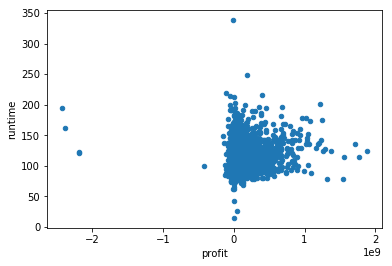

In [32]:
movie_df.plot(x='profit', y='runtime', kind='scatter');

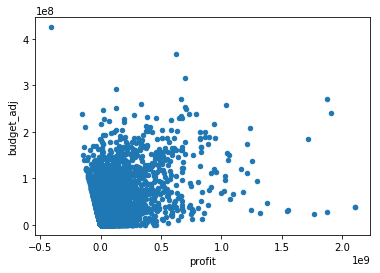

In [59]:
movie_df.plot(x='profit', y='budget_adj', kind='scatter');

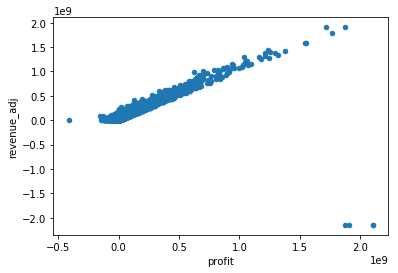

In [60]:
movie_df.plot(x='profit', y='revenue_adj', kind='scatter');

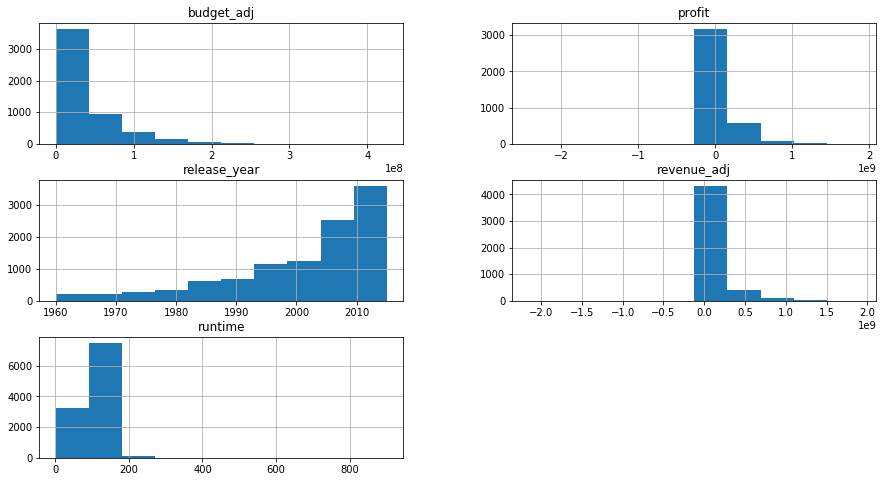

In [30]:
movie_df.hist(figsize=(15,8));

<a id='conclusions'></a>
## Conclusions

>My goal of this data analysis is to answer the 2 main questions  - (1)  properties and attributes of the movies from year 1960 to 2015? (2) kind of properties that are associated with movies with a high profit of at least 100 Million dollars? After the above analysis, I can conclude the following:
**Properties and attributes of the movies from year 1960 to 2015: **

- Average Budget around 74 Million Dollars
- Average runtime of the movie 116 minutes
- Any one of these should be in the cast : Tom Cruise, Tom Hanks, Sylvester Stallone, Brad Pitt, Eddie Murphy
- Any one of these should be the director:  Steven Spielberg, Robert Zemeckis, Ron Howard, Clint Eastwood, Michael Bay
- Genre must be: Comedy, Drama, Action, Adventure, Thriller
- Movie plot should be based on novel, related to dystopia, duringcreditsstinger, london and saving the world




>>**For a movie to have a profit of at least 100 Million Dollars:**

- Average Budget must be around 74 Million Dollars
- Average runtime of the movie must be 116 minutes
- Month to release the movie: June & December
- Any one of these should be in the cast : Tom Cruise, Tom Hanks, Sylvester Stallone, Brad Pitt, Eddie Murphy
- Any one of these should be the director:  Steven Spielberg, Robert Zemeckis, Ron Howard, Clint Eastwood, Michael Bay
- Genre must be: Comedy, Drama, Action, Adventure, Thriller
- Movie plot should be based on novel, related to dystopia, duringcreditsstinger, london and saving the world

By meeting the above criteria, the movie will have a higher probability to be a hit and earn an average revenue of around XXX million dollar and profit of at least 100 million dollars.

Do note that the above analysis was done on the movies from 1960 to 2015 and with a profit of at least 100 million dollar. Considering that there is a huge number of missing data and noticed some of the error values for the movies (etc $1 for some of the movies).